In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_url = '../datasets/taxstats2015.csv'

data = pd.read_csv(file_url, usecols=["Postcode", "Average net tax","Average total deductions"])
data.shape

(2473, 3)

In [6]:
data.head()

,Postcode,Average total deductions,Average net tax
0,2000,2071,27555
1,2006,3804,28142
2,2007,1740,15649
3,2008,3917,53976
4,2009,3433,32430


In [7]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
seed = 1200

model1 = KMeans(random_state=seed)

In [9]:
X = data[['Average net tax', 'Average total deductions']]
model1.fit(X)

KMeans(random_state=1200)

In [10]:
y_preds = model1.predict(X)
y_preds

array([1, 1, 6, ..., 6, 1, 6])

In [11]:
# adding these orediction into dataframe
data['cluster'] = y_preds
data.head()

,Postcode,Average total deductions,Average net tax,cluster
0,2000,2071,27555,1
1,2006,3804,28142,1
2,2007,1740,15649,6
3,2008,3917,53976,2
4,2009,3433,32430,5


## Interpreting KMeans results

In [12]:
data_pivot = data.pivot_table(
    values=[
        'Average net tax',
        'Average total deductions'
    ],
    index='cluster',
    aggfunc=np.mean
    )


In [13]:
data_pivot

,Average net tax,Average total deductions
cluster,,
0,13156.817808,2503.142466
1,26765.963235,3498.676471
2,51412.703704,6234.333333
3,10222.208333,2179.360215
4,20522.799320,2909.680272
5,36197.407895,4789.328947
6,16502.080786,2658.209607
7,79316.875000,13057.750000


In [14]:
data.loc[data.cluster == 0].count()

Postcode                    730
Average total deductions    730
Average net tax             730
cluster                     730
dtype: int64

In [15]:
import altair as alt

In [16]:
chart = alt.Chart(data)

In [17]:
scatter_plot = chart.mark_circle()

In [18]:
scatter_plot.encode(
    x='Average net tax', 
    y='Average total deductions', 
    color='cluster:N', 
    tooltip = ['Postcode', 'cluster', 'Average net tax', 'Average total deductions']
).interactive()

alt.Chart(...)

## Clustering using KMeans cluster

In [19]:
df = pd.read_csv(file_url,usecols=[
    'Postcode', 
    'Average total business income',
    'Average total business expenses',

])

In [20]:
df.head()

,Postcode,Average total business income,Average total business expenses
0,2000,210901,222191
1,2006,69983,48971
2,2007,575099,639499
3,2008,53329,32173
4,2009,237539,222993


In [21]:
X = df[['Average total business income', 'Average total business expenses']]

In [22]:
model2 = KMeans(random_state=seed)
model2.fit(X)

KMeans(random_state=1200)

In [23]:
y_preds = model2.predict(X)
y_preds[-10:]

array([3, 0, 0, 6, 5, 0, 0, 0, 0, 3])

In [24]:
df['cluster'] = y_preds
df.tail()

,Postcode,Average total business income,Average total business expenses,cluster
2468,870,62793,44687,0
2469,872,53025,45670,0
2470,880,45603,28700,0
2471,885,53148,39850,0
2472,886,121057,90120,3


#### Generate a pivot table with the averages of the two columns for each cluster value using the pivot_table method

In [25]:
df.pivot_table(values=['Average total business income','Average total business expenses'], index='cluster', aggfunc=np.mean)

,Average total business expenses,Average total business income
cluster,,
0,38069.345886,53548.087866
1,173350.259740,208767.740260
2,449722.500000,488551.625000
3,82319.305970,104102.712687
4,812481.333333,837920.333333
5,118572.299517,145933.570048
6,58269.801991,76395.919248
7,250410.190476,301417.809524


In [27]:
scatter_plot = alt.Chart(df).mark_circle()

scatter_plot.encode(
    x='Average total business income', 
    y='Average total business expenses', 
    color='cluster:N', 
    tooltip = ['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

#### Find optimum number of cluster using Elbow method.

In [28]:
clusters = pd.DataFrame()
clusters['cluster_range'] = range(1, 10)
inertia = []

In [29]:
for k in clusters['cluster_range']:
    kmeans = KMeans(n_clusters=k, random_state=seed).fit(X)
    inertia.append(kmeans.inertia_)

In [30]:
clusters['inertia'] = inertia
clusters

,cluster_range,inertia
0,1,1.333516e+13
1,2,7.063097e+12
2,3,3.718683e+12
3,4,2.341849e+12
4,5,1.713807e+12
5,6,1.226248e+12
6,7,9.445246e+11
7,8,7.488395e+11
8,9,6.348769e+11


In [31]:
# plotting the cluster_range vs inertia
alt.Chart(clusters).mark_line().encode(
    x='cluster_range',
    y='inertia'
)

alt.Chart(...)

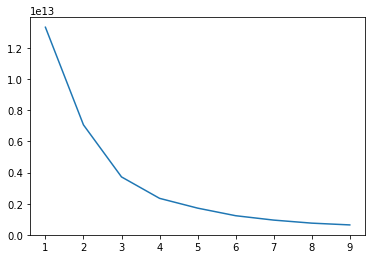

In [35]:
plt.plot(clusters['cluster_range'], clusters['inertia'])
plt.show()

In [39]:
model3 = KMeans(random_state=42, n_clusters=4)
model3.fit(X)

df['cluster2'] = model3.predict(X)

scatter_plot.encode(
    x='Average total business income', 
    y='Average total business expenses', 
    color='cluster2:N', 
    tooltip = ['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

Tuning hyperparameter

In [40]:
kmeans = KMeans(random_state=seed, n_clusters=4,init='k-means++', n_init=5)

kmeans.fit(X)


df['cluster4'] = model3.predict(X)

scatter_plot.encode(
    x='Average total business income', 
    y='Average total business expenses', 
    color='cluster4:N', 
    tooltip = ['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']
).interactive()

alt.Chart(...)

In [51]:
centroids = kmeans.cluster_centers_

centroids = pd.DataFrame(centroids, columns=[ 
    'Average total business income',
    'Average total business expenses'
])

print(centroids)

   Average total business income  Average total business expenses
0                  114092.578875                     91212.032922
1                   66235.259740                     49277.846630
2                  602832.500000                    566127.800000
3                  222102.794872                    183281.333333


In [52]:
chart1 = scatter_plot.encode(
    x='Average total business income', 
    y='Average total business expenses', 
    color='cluster4:N', 
    tooltip = ['Postcode', 'cluster', 'Average total business income', 'Average total business expenses']
).interactive()



In [53]:
chart2 = alt.Chart(centroids).mark_circle(size=100).encode(
    x='Average total business income', 
    y='Average total business expenses', 
    color=alt.value('black'), 
    tooltip = ['Average total business income', 'Average total business expenses']
).interactive()

In [54]:
chart2

alt.Chart(...)

In [55]:
chart1 + chart2

alt.LayerChart(...)